In [ ]:
'''
data_array = [
(19.00000000, 365.149813, 169.294290),
(19.25000000, 425.199931, 178.806443),
(19.50000000, 513.171405, 202.283296),
(19.75000000, 712.523321, 244.784065),
(20.00000000, 966.080948, 376.875250),
(20.25000000, 1361.55769, 494.708712),
(20.50000000, 1807.64873, 586.642867),
(18.75000000, 415.805144, 191.172220),
(18.50000000, 541.516375, 236.716033),
(18.25000000, 720.722694, 328.359542),
(18.00000000, 964.315251, 446.496222),
(17.75000000, 1281.34952, 543.940878),
(17.50000000, 1739.16612, 669.486148),
(17.00000000, 2686.77511, 811.070784),
(16.00000000, 5260.66535, 1076.035956),
(15.00000000, 8766.50073, 1799.66114),
(14.00000000, 13113.7650, 2889.48734),
(13.00000000, 17996.5232, 4149.67677),
(21.00000000, 2933.88806, 893.932228),
(22.00000000, 6350.86734, 1697.84097),
(23.00000000, 10144.5319, 2594.19953),
(24.00000000, 15431.5668, 3293.53776),
(25.00000000, 20519.2706, 5094.98579),
#TEM10
]#cm-像素平方
'''

width_squared_datax_cm: [1.67958946e-05 1.78519234e-05 2.68967336e-05 4.49672649e-05
 6.73783403e-05 1.03528000e-04 1.35490268e-04 1.70402709e-04
 2.44741762e-04 3.19959068e-04 1.92465790e-05 3.07762276e-05
 5.10926611e-05 7.99904820e-05 1.13510615e-04 1.51615943e-04
 1.89823948e-04 2.32697783e-04 3.17729898e-04 3.95330527e-04]
width_squared_datax_cm_mean: 0.00013649133135403498
width_squared_datax_cm_sig: 0.0001116449800849055
x Fitting Results:
W0_x (Beam Waist Radius/cm): 0.005692479643482893
z0_x (Beam Waist Position/cm): 19.87850130633982
M_squaredx: 1.0350674498086552
x Calculated Rayleigh distance and Theta:
zR0_x (Rayleigh Length/cm): 1.608741905292872
zRM_x (Rayleigh Length/cm): 1.5542387170906278
Theta0_x (radians): 0.003538466689252168
ThetaM_x (radians): 0.0036625516922771167
x parameters before lens:
W0_1x (Beam Waist Radius before lens/cm): 0.021798111578581185
z0_1x (Beam Waist Position before lens/cm): 72.87202762279782
zRM_1x (Rayleigh Length before lens/cm): 22.790428

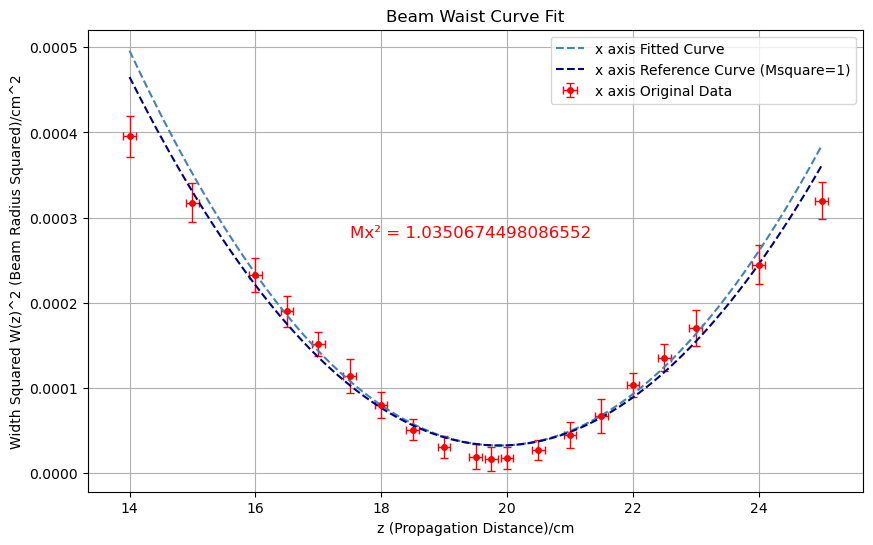

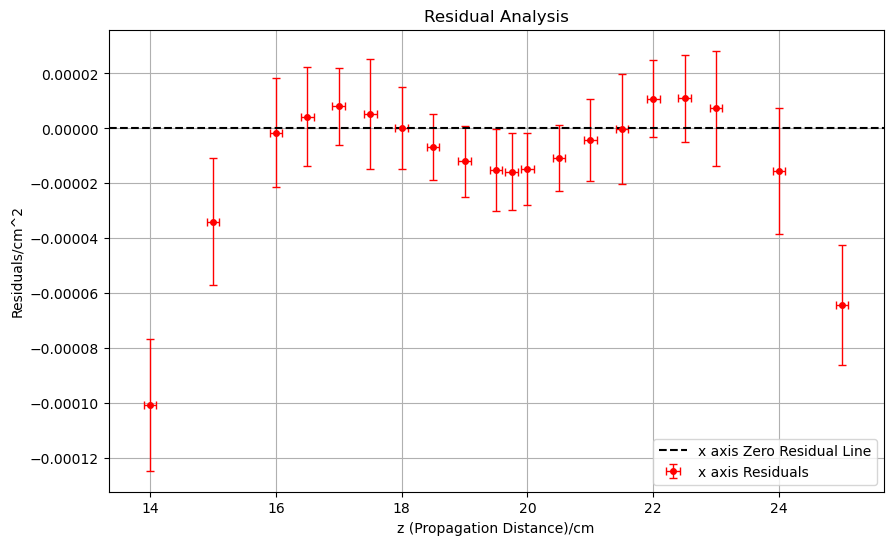

width_squared_datay_cm: [1.71573662e-05 1.99053425e-05 2.60707279e-05 4.21420230e-05
 6.60518774e-05 1.01446967e-04 1.36847311e-04 1.76616905e-04
 2.59489334e-04 3.46628659e-04 2.16294047e-05 3.90366668e-05
 5.95703007e-05 9.73471351e-05 1.32672834e-04 1.66298488e-04
 2.02509646e-04 2.51035783e-04 3.38145698e-04 4.48965265e-04]
width_squared_datay_cm_mean: 0.00014747838675806252
width_squared_datay_cm_sig: 0.00012256129616726273
y Fitting Results:
W0_y (Beam Waist Radius/cm): 0.005503074762764364
z0_y (Beam Waist Position/cm): 19.944869043214474
M_squaredy: 1.0579611872570958
y Calculated Rayleigh distance and Theta:
zR0_y (Rayleigh Length/cm): 1.5034681359902418
zRM_y (Rayleigh Length/cm): 1.421099520567651
Theta0_y (radians): 0.0036602536701849206
ThetaM_y (radians): 0.003872406318570981
y parameters before lens:
W0_1y (Beam Waist Radius before lens/cm): 0.0209989336010586
z0_1y (Beam Waist Position before lens/cm): 73.44023991733307
zRM_1y (Rayleigh Length before lens/cm): 20.692270

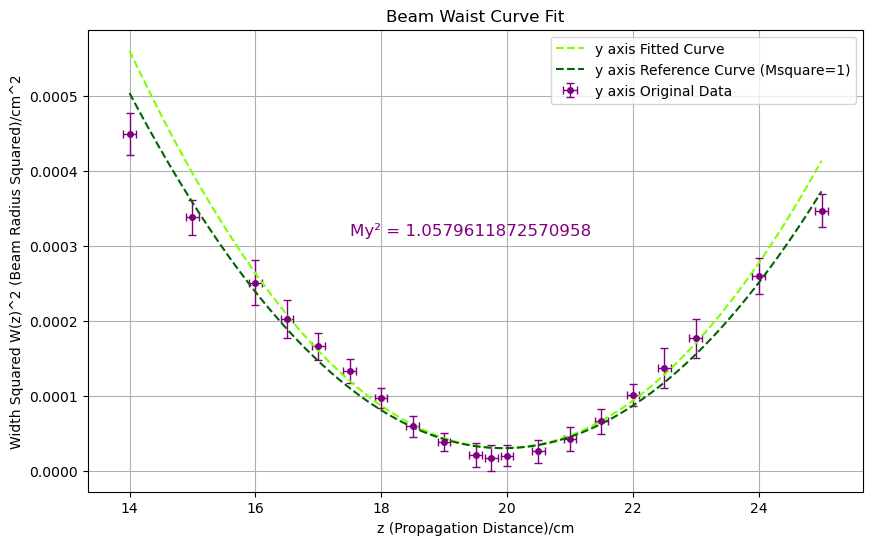

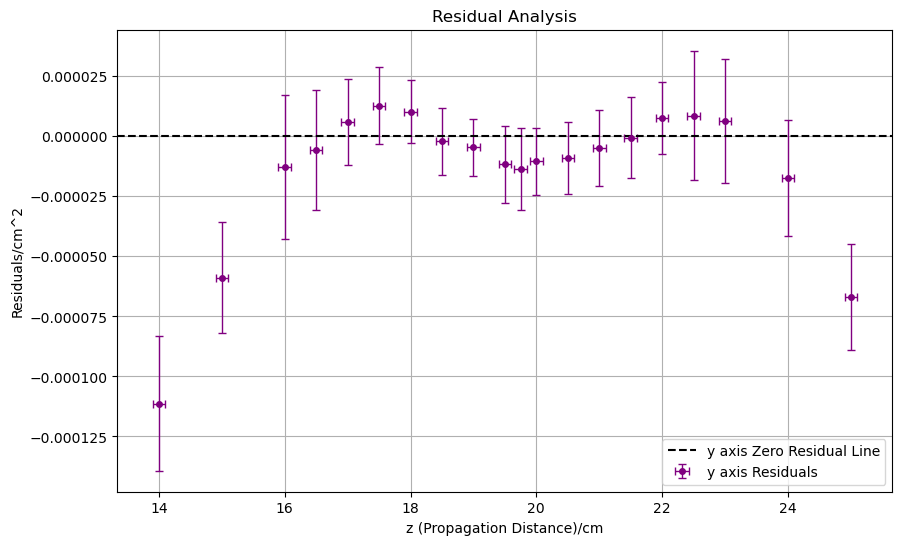

In [17]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义拟合公式
def beam_waist_curve(z, W0, z0, M_squared):
    """
    光束传播公式的平方形式：
    W(z)^2 = W0^2 * (1 + M_squared**2 *((z - z0)^2) / (np.pi * W0_fit**2 / 632.8e-07)^2)
    
    Parameters:
        z  : Propagation distance
        W0 : Beam waist radius
        z0 : Beam waist position
        zR0 : Rayleigh length=pai*w0^2/lamda
        M_squared
    Returns:
        Beam width radius squared W(z)^2 at propagation distance z
    """
    return W0**2 * (1 + (M_squared**2)*((z - z0)**2) / ((np.pi * W0**2 / 632.8e-07)**2))#z-cm z0-cm W0-cm W0-cm^2 lamda-632.8e-07cm

# 测量数据 (z, W(z)^2)

data_array = [
(19.75, 141.14197146, 144.17954805),
(20.0, 150.01616327, 167.27178612),
(20.5, 226.02297116, 219.08174683),
(21.0, 377.87617559, 354.13464687),
(21.5, 566.20454029, 555.05779328),
(22.0, 869.9831915, 852.49552346),
(22.5, 1138.57368104, 1149.97740154),
(23.0, 1431.95553395, 1484.17567445),
(24.0, 2056.65345957, 2180.58263611),
(25.0, 2688.73166348, 2912.84587625),
(19.5, 161.73595811, 181.75970352),
(19.0, 258.62376166, 328.03921675),
(18.5, 429.35009301, 500.5907626),
(18.0, 672.18892439, 818.04315195),
(17.5, 953.87071825, 1114.89776603),
(17.0, 1274.08355698, 1397.4662853),
(16.5, 1595.15922272, 1701.7617287),
(16.0, 1955.443556, 2109.54439882),
(15.0, 2669.99914009, 2841.56048531),
(14.0, 3322.10527278, 3772.81735681),
#TEM00
]#cm-像素平方
"""
(1.70000000e+01, 2.42191356e+03, 2.28658163e+03),
(1.80000000e+01, 8.91698590e+02, 9.33649476e+02),
(1.90000000e+01, 6.08593115e+02, 7.42322116e+02),
(2.00000000e+01, 1.04153452e+03, 9.98790847e+02),
(2.10000000e+01, 2.68010932e+03, 2.40228266e+03),
(2.20000000e+01, 5.42981615e+03, 4.73234662e+03),
(2.30000000e+01, 8.49865230e+03, 7.46546529e+03),
(2.40000000e+01, 1.31695303e+04, 1.15451217e+04),
(2.50000000e+01, 1.77037170e+04, 1.58229116e+04),
(2.80000000e+01, 3.09993682e+04, 3.20030234e+04),
(1.30000000e+01, 1.53082111e+04, 1.48349862e+04),
(1.50000000e+01, 7.89430250e+03, 7.44013687e+03),
217#
(1.90000000e+01, 2.93665736e+02, 3.05907370e+02),
(1.92500000e+01, 3.56101913e+02, 3.67576276e+02),
(1.95000000e+01, 4.72202160e+02, 4.79960334e+02),
(1.97500000e+01, 6.27779477e+02, 6.40931851e+02),
(2.00000000e+01, 8.88196547e+02, 8.35276696e+02),
(2.02500000e+01, 1.27137923e+03, 1.25673938e+03),
(2.05000000e+01, 1.53126061e+03, 1.34560465e+03),
(1.87500000e+01, 3.16693587e+02, 3.00155657e+02),
(1.85000000e+01, 3.67312208e+02, 3.59411501e+02),
(1.82500000e+01, 5.15831842e+02, 4.73526924e+02),
(1.80000000e+01, 7.59454239e+02, 6.30348857e+02),
(1.77500000e+01, 1.00564767e+03, 8.64611167e+02),
(1.75000000e+01, 1.31495552e+03, 1.18643584e+03),
(1.70000000e+01, 1.99448209e+03, 1.81814782e+03),
(1.60000000e+01, 3.83303495e+03, 3.98874476e+03),
(1.50000000e+01, 6.57599171e+03, 6.55671090e+03),
(1.40000000e+01, 9.44976888e+03, 9.69732282e+03),
(1.30000000e+01, 1.29046417e+04, 1.27125826e+04),
(2.10000000e+01, 2.41207663e+03, 2.34722633e+03),
(2.20000000e+01, 4.87905470e+03, 4.26496711e+03),
(2.30000000e+01, 7.55605179e+03, 7.14094161e+03),
(2.40000000e+01, 1.09864339e+04, 1.07307314e+04),
(2.50000000e+01, 1.50937718e+04, 1.43245412e+04),
224
(19.5, 350.09025, 301.88471),
(20.0, 352.538046, 337.011343),
(20.5, 514.922329, 574.920105),
(21.0, 877.246508, 987.160531),
(21.5, 1372.52586, 1467.88839),
(22.0, 2063.16026, 2138.73019),
(22.5, 2811.91129, 3001.91778),
(23.0, 3588.52809, 3994.52369),
(23.5, 4616.51679, 5220.79325),
(24.0, 5668.73161, 6389.10145),
(24.5, 6873.95063, 7797.01635),
(25.0, 8232.18076, 9195.02548),
(25.5, 9668.53473, 10898.2017),
(26.0, 11207.9176, 12542.1091),
(26.5, 12723.3354, 14361.5304),
(19.0, 518.768389, 441.934754),
(18.5, 897.390559, 762.593831),
(18.0, 1287.66419, 1232.09409),
(17.5, 1926.4239, 1902.49748),
(17.0, 2687.06103, 2633.12447),
(16.5, 3495.20283, 3553.38836),
(16.0, 4445.2714, 4698.15607),
(15.5, 5409.52825, 5898.18677),
(15.0, 6727.854, 7133.08477),
(14.5, 7725.80192, 8654.89377),
(14.0, 9287.78764, 9996.45052),
(13.5, 10279.3743, 11725.1419),
(13.0, 11604.4479, 12958.8504),
(12.5, 12725.2265, 15017.2117),
(12.0, 14243.9286, 16693.8623),
(11.5, 15931.4567, 18366.8533),
(11.0, 17417.2158, 19759.9467),
(10.5, 18556.9479, 22268.4869),
#LG10


(1.70000000e+01, 3.15295026e+03, 1.30779813e+03),
(1.80000000e+01, 1.07541987e+03, 6.18934630e+02),
(1.90000000e+01, 4.32612143e+02, 4.03759075e+02),
(2.00000000e+01, 1.20302289e+03, 6.10811811e+02),
(2.10000000e+01, 3.20920583e+03, 1.28462344e+03),
(2.20000000e+01, 6.22460314e+03, 2.29581531e+03),
(2.30000000e+01, 1.07327678e+04, 3.60823031e+03),
(2.40000000e+01, 1.61651096e+04, 4.90330205e+03),
(2.50000000e+01, 2.27402546e+04, 6.25934129e+03),
(2.80000000e+01, 3.89614686e+04, 9.19687218e+03),
(1.30000000e+01, 2.02598040e+04, 5.10884925e+03),
(1.40000000e+01, 1.49108338e+04, 4.28455740e+03),
(1.50000000e+01, 9.97491600e+03, 3.22968301e+03),
(1.60000000e+01, 5.93091478e+03, 2.16220486e+03),
217-4
(19.00000000, 365.149813, 169.294290),
(19.25000000, 425.199931, 168.806443),
(19.50000000, 513.171405, 192.283296),
(19.75000000, 712.523321, 244.784065),
(20.00000000, 966.080948, 326.875250),
(20.25000000, 1361.55769, 424.708712),
(20.50000000, 1807.64873, 556.642867),
(18.75000000, 415.805144, 191.172220),
(18.50000000, 541.516375, 236.716033),
(18.25000000, 720.722694, 288.359542),
(18.00000000, 964.315251, 356.496222),
(17.75000000, 1281.34952, 423.940878),
(17.50000000, 1739.16612, 529.486148),
(17.00000000, 2686.77511, 701.070784),
(16.00000000, 5260.66535, 976.035956),
(15.00000000, 8766.50073, 1199.66114),
(14.00000000, 13113.7650, 1589.48734),
(13.00000000, 17996.5232, 1649.67677),
(21.00000000, 2933.88806, 873.932228),
(22.00000000, 6350.86734, 1597.84097),
(23.00000000, 10144.5319, 2094.19953),
(24.00000000, 15431.5668, 2293.53776),
(25.00000000, 20519.2706, 2194.98579),
217修正#
(19.00000000, 365.149813, 169.294290),
(19.25000000, 425.199931, 178.806443),
(19.50000000, 513.171405, 202.283296),
(19.75000000, 712.523321, 244.784065),
(20.00000000, 966.080948, 376.875250),
(20.25000000, 1361.55769, 494.708712),
(20.50000000, 1807.64873, 586.642867),
(18.75000000, 415.805144, 191.172220),
(18.50000000, 541.516375, 236.716033),
(18.25000000, 720.722694, 328.359542),
(18.00000000, 964.315251, 446.496222),
(17.75000000, 1281.34952, 543.940878),
(17.50000000, 1739.16612, 669.486148),
(17.00000000, 2686.77511, 811.070784),
(16.00000000, 5260.66535, 1076.035956),
(15.00000000, 8766.50073, 1799.66114),
(14.00000000, 13113.7650, 2889.48734),
(13.00000000, 17996.5232, 4149.67677),
(21.00000000, 2933.88806, 893.932228),
(22.00000000, 6350.86734, 1697.84097),
(23.00000000, 10144.5319, 2594.19953),
(24.00000000, 15431.5668, 3293.53776),
(25.00000000, 20519.2706, 5094.98579),
#TEM10

data_array = [
#
(1.70000000e+01, 7.78290447e+02, 8.88929356e+02),  
(1.75000000e+01, 5.89846734e+02, 6.90373619e+02),  
(1.80000000e+01, 4.25488256e+02, 5.04012178e+02),  
(1.85000000e+01, 3.17342839e+02, 3.76832691e+02),  
(1.90000000e+01, 2.74056010e+02, 3.08838076e+02),  
(1.95000000e+01, 2.78814857e+02, 2.79887697e+02),  
(2.00000000e+01, 3.33547280e+02, 3.14723588e+02),  
(2.05000000e+01, 4.35077489e+02, 4.17847885e+02),  
(2.10000000e+01, 5.94681627e+02, 5.64432741e+02),  
(2.15000000e+01, 8.67381222e+02, 8.29961886e+02),  
(2.20000000e+01, 1.12961471e+03, 1.07195254e+03),  
(2.25000000e+01, 1.43579001e+03, 1.37300113e+03),  
(2.30000000e+01, 1.82635328e+03, 1.69182138e+03),  
(2.50000000e+01, 3.81948844e+03, 3.65875218e+03),  
(2.70000000e+01, 6.16782599e+03, 6.01100259e+03),  
217
(19.00, 219.25175849, 223.85405914),
(19.25, 226.58592017, 223.88854733),
(19.50, 234.13923973, 246.79183137),
(19.75, 278.37998953, 288.52175938),
(20.00, 319.29049717, 317.88607106),
(20.25, 380.02132749, 372.0999776),
(20.50, 435.36651269, 432.2856741),
(18.75, 271.08269944, 239.72695629),
(18.50, 304.37072912, 258.51055788),
(18.25, 373.1251331, 313.97536208),
(18.00, 484.58414724, 367.64428251),
(17.75, 508.52234196, 413.52837872),
(17.50, 621.21479844, 518.58104654),
(17.00, 893.64938392, 706.38310327),
(16.00, 1438.57989917, 1127.16842981),
(15.00, 2133.83641061, 1634.11226469),
(14.00, 2854.543389, 2444.17190398),
(13.00, 3683.10906531, 3090.01712825),
(21.00, 630.31297104, 588.3674039),
(22.00, 1148.00729884, 970.41603826),
(23.00, 1739.70372845, 1495.25335675),
(24.00, 2523.79816147, 2189.65239643),
(25.00, 3335.86084236, 2829.35304526),
217修正#
(19.00, 219.25175849, 223.85405914),
(19.25, 226.58592017, 223.88854733),
(19.50, 234.13923973, 236.79183137),
(19.75, 278.37998953, 268.52175938),
(20.00, 319.29049717, 329.88607106),
(20.25, 380.02132749, 382.0999776),
(20.50, 435.36651269, 432.2856741),
(18.75, 271.08269944, 259.72695629),
(18.50, 304.37072912, 298.51055788),
(18.25, 373.1251331, 371.97536208),
(18.00, 484.58414724, 487.64428251),
(17.75, 508.52234196, 533.52837872),
(17.50, 621.21479844, 618.58104654),
(17.00, 893.64938392, 886.38310327),
(16.00, 1438.57989917, 1427.16842981),
(15.00, 2133.83641061, 2134.11226469),
(14.00, 2854.543389, 2874.17190398),
(13.00, 3683.10906531, 3760.01712825),
(21.00, 630.31297104, 628.3674039),
(22.00, 1148.00729884, 1120.41603826),
(23.00, 1739.70372845, 1775.25335675),
(24.00, 2523.79816147, 2489.65239643),
(25.00, 3335.86084236, 3349.35304526),

220-2
(19.75, 215.17668891, 219.41733304),
(20.0, 238.52561746, 234.81822132),
(20.25, 299.89857081, 263.60905796),
(20.5, 358.23180907, 295.73874914),
(20.75, 410.338285, 330.80009945),
(21.0, 493.89305119, 405.81271883),
(21.25, 562.11614116, 475.35110517),
(21.5, 681.0434524, 572.27558988),
(21.75, 789.56166075, 647.65903786),
(22.0, 931.34619722, 780.43356084),
(23.0, 1453.59499689, 1272.66497228),
(24.0, 2063.36952152, 1877.26598523),
(25.0, 2695.41887399, 2479.25602434),
(19.5, 208.54122761, 219.4917517),
(19.25, 206.79187276, 230.45250227),
(19.0, 219.94291277, 247.41854419),
(18.75, 246.4737613, 282.89028062),
(18.5, 282.11446683, 326.26393879),
(18.25, 348.7377665, 394.86293966),
(18.0, 416.52496166, 461.53408421),
(17.75, 492.30328244, 557.41058236),
(17.5, 572.86241156, 645.94189869),
(17.25, 669.40198554, 742.23172936),
(17.0, 771.11096647, 850.65048171),
(16.75, 887.79413627, 971.24105616),
(16.5, 1022.76226414, 1098.97119522),
(16.25, 1177.44331691, 1280.97920249),
(16.0, 1291.77422304, 1354.1077066),
(15.0, 1956.9900587, 1996.82160972),
(14.0, 2573.50622316, 2555.01660763),
220-3
(19.75, 222.55202531, 223.56511544),
(20.0, 248.33490515, 236.34726009),
(20.25, 300.36787659, 264.1434826),
(20.5, 355.96028601, 298.23518563),
(20.75, 415.11797655, 340.67385912),
(21.0, 489.40570193, 411.52287325),
(21.25, 572.66928855, 487.99370047),
(21.5, 686.90746145, 577.79341871),
(21.75, 824.99572038, 686.03548935),
(22.0, 926.06361135, 799.70068584),
(22.25, 1065.0067488, 908.68497034),
(22.5, 1210.48917071, 1039.17471637),
(23.0, 1501.70208954, 1299.92995303),
(24.0, 2108.7752387, 1918.11965698),
(25.0, 2675.95173435, 2620.98624995),
(19.5, 216.81632728, 214.61662559),
(19.25, 207.80390904, 229.32482312),
(19.0, 223.35210846, 254.06588396),
(18.75, 253.6329549, 287.38685861),
(18.5, 295.75140002, 335.82180175),
(18.25, 346.28205954, 387.29968415),
(18.0, 414.44112929, 455.00904343),
(17.75, 480.63954621, 529.86636691),
(17.5, 576.52179276, 632.9911734),
(17.25, 666.76840409, 724.36431483),
(17.0, 789.33098984, 882.67690661),
(16.0, 1297.86126683, 1341.0255351),
(15.0, 2001.11040385, 1997.58002761),
(14.0, 2603.80442573, 2530.08941444),
220-4-large pinhole#
(19.75, 141.14197146, 144.17954805),
(20.0, 150.01616327, 136.27178612),
(20.5, 226.02297116, 189.08174683),
(21.0, 377.87617559, 321.13464687),
(21.5, 566.20454029, 535.05779328),
(22.0, 869.9831915, 852.49552346),
(22.5, 1138.57368104, 1149.97740154),
(23.0, 1431.95553395, 1484.17567445),
(24.0, 2056.65345957, 2280.58263611),
(25.0, 2688.73166348, 3112.84587625),
(19.5, 161.73595811, 181.75970352),
(19.0, 258.62376166, 328.03921675),
(18.5, 429.35009301, 530.5907626),
(18.0, 672.18892439, 818.04315195),
(17.5, 953.87071825, 1114.89776603),
(17.0, 1274.08355698, 1497.4662853),
(16.5, 1595.15922272, 1731.7617287),
(16.0, 1955.443556, 2109.54439882),
(15.0, 2669.99914009, 2941.56048531),
(14.0, 3322.10527278, 4072.81735681),
220-5
(19.75, 237.77634251, 253.13971675),
(19.5, 267.93114103, 271.96290955),
(19.0, 358.22991605, 347.9452277),
(18.5, 509.58581723, 474.40207021),
(18.0, 700.42730776, 640.98967804),
(17.0, 1229.81205971, 1066.25579197),
(16.0, 1964.22213892, 1751.54081941),
(15.0, 2886.63216262, 2605.3423834),
(14.0, 3848.31070404, 3529.2840612),
(20.0, 227.73400152, 257.80929691),
(20.5, 244.8572134, 290.11498935),
(21.0, 321.68397946, 334.99166263),
(21.5, 440.42345546, 504.4077559),
(22.0, 602.82021826, 590.81071161),
(23.0, 1070.67422092, 1059.41269849),
(24.0, 1682.03310442, 1671.26900379),
(25.0, 2497.19845376, 2419.79624225),
0224
(19.5, 430.82907281, 413.6648867),
(20.0, 444.95331072, 413.91298579),
(20.5, 462.54314677, 445.26207384),
(21.0, 504.63721231, 467.69337424),
(21.5, 557.02573242, 524.14584668),
(22.0, 638.26898907, 604.37009246),
(22.5, 732.28728052, 676.2637189),
(23.0, 850.74101997, 794.56187847),
(23.5, 983.00388978, 934.06193304),
(24.0, 1166.6666635, 1109.42967511),
(24.5, 1352.88445894, 1266.22722824),
(25.0, 1611.1459462, 1569.37087204),
(25.5, 1611.89901182, 1946.6152831),
(26.0, 1843.58961575, 2218.14642539),
(26.5, 2058.89379356, 2537.39353559),
(27.0, 2257.25868896, 2986.90743221),
(27.5, 2438.84366938, 3345.664903),
(28.0, 2437.45000235, 3571.34822059),
(28.5, 2731.13164324, 3845.46188861),
(29.0, 2804.25315326, 4098.61531614),
(29.5, 2759.98756812, 4532.04053549),
(30.0, 3147.35256644, 5005.86795063),
(19.0, 528.89569214, 392.34565804),
(18.5, 561.78468033, 430.11392608),
(18.0, 624.82341968, 519.46364861),
(17.5, 723.69073946, 618.46890533),
(17.0, 835.08620719, 752.49060058),
(16.5, 965.47479793, 938.18110741),
(16.0, 1108.12354567, 1106.2011032),
(15.5, 1329.08104977, 1336.95521614),
(15.0, 1606.64781102, 1590.3055042),
(14.5, 1728.60318076, 1817.98756549),
(14.0, 2112.77464997, 2161.6798167),
(13.5, 2359.83002403, 2475.33034862),
(13.0, 2565.80906948, 2782.2827597),
(12.5, 2827.86630491, 3134.7935228),
(12.0, 3019.88904905, 3500.4053374),
(11.5, 3304.61528033, 3941.77121921),
(11.0, 3706.33134198, 4420.85237052),
(10.5, 3810.68655838, 4768.65247871),
(10.0, 4085.94158143, 5140.30159013),

#TEM00
]#cm-像素平方
"""
z_width_squared_data = data_array
# 转换为 NumPy 数组
z_data, width_squared_datax, width_squared_datay = zip(*z_width_squared_data) #cm-像素平方
z_data = np.array(z_data) #cm
width_squared_datax= np.array(width_squared_datax) * 11.9e-08 #cm^2 
width_squared_datay= np.array(width_squared_datay) * 11.9e-08 #cm^2 
print("width_squared_datax_cm:",width_squared_datax)
#x axis
# 初步估计初始参数 (W0, z0)
W0_initialx = np.sqrt(min(width_squared_datax))  # Take the square root of the minimum W^2
z0_initialx = z_data[np.argmin(width_squared_datax)]  # The z value corresponding to the minimum W
M_squared_initialx = 1
initial_guessx = [W0_initialx, z0_initialx, M_squared_initialx]


# 定义权重，权重与测量值成反比
# 如果测量误差未知，这里假设权重为 1 / width_squared
#weights = 1/(width_squared_datax**1)
# 如果测量误差未知，这里假设权重为 width_squared
#weights = 1/width_squared_datax**2

mu = np.mean(width_squared_datax)  # 取均值作为中心
sig = np.std(width_squared_datax)  # 取标准差决定宽度
print("width_squared_datax_cm_mean:",mu)
print("width_squared_datax_cm_sig:",sig)
weights = np.exp(-((width_squared_datax - 1*mu) ** 2) / (2 * sig ** 2))
# 进行非线性加权最小二乘法拟合
poptx, pcovx = curve_fit(
    beam_waist_curve,
    z_data,
    width_squared_datax,
    p0=initial_guessx,
    sigma=1/weights  # 设置权重
)

# 获取拟合参数
W0_fitx, z0_fitx, M_squaredx = poptx
print("x Fitting Results:")
print(f"W0_x (Beam Waist Radius/cm): {W0_fitx}")  # Fitted beam waist radius W0
print(f"z0_x (Beam Waist Position/cm): {z0_fitx}")
print(f"M_squaredx: {M_squaredx}")

print("x Calculated Rayleigh distance and Theta:")
zR0x=(np.pi * W0_fitx**2 / 632.8e-07)#cm
print(f"zR0_x (Rayleigh Length/cm): {zR0x}")
zRMx=zR0x/M_squaredx#cm
print(f"zRM_x (Rayleigh Length/cm): {zRMx}")
theta0_radx=(632.8e-07/(np.pi * W0_fitx) )#radians
print(f"Theta0_x (radians): {theta0_radx}")
thetaM_radx=M_squaredx * theta0_radx#radians
print(f"ThetaM_x (radians): {thetaM_radx}")

# 透镜前原光束参数
print("x parameters before lens:")
f=16#cm,焦距
T=f**2/((z0_fitx-f)**2+zRMx**2)#转换系数
W0_1x=(T**(1/2))*W0_fitx#cm
print(f"W0_1x (Beam Waist Radius before lens/cm): {W0_1x}")
z0_1x=f+T*(z0_fitx-f)
print(f"z0_1x (Beam Waist Position before lens/cm): {z0_1x}")
zRM_1x=T*(zRMx)
print(f"zRM_1x (Rayleigh Length before lens/cm): {zRM_1x}")
M_squared_1x=(np.pi * W0_1x**2)/(zRM_1x*632.8e-07)
print(f"M_squared_1x: {M_squared_1x}")
thetaM_rad_1x=M_squared_1x *(632.8e-07/(np.pi * W0_1x) )#radians
print(f"ThetaM_1x before lens/radians: {thetaM_rad_1x}")

# 生成拟合曲线
z_fit = np.linspace(min(z_data), max(z_data), 500)
width_squared_fitx = beam_waist_curve(z_fit, W0_fitx, z0_fitx, M_squaredx)
width_squared_fit0x = beam_waist_curve(z_fit, W0_fitx, z0_fitx, M_squared=1)

# 误差数据
"""
data_array = [
(19.75, 141.14197146, 144.17954805),
(20.0, 150.01616327, 136.27178612),
(20.5, 226.02297116, 189.08174683),
(21.0, 377.87617559, 321.13464687),
(21.5, 566.20454029, 535.05779328),
(22.0, 869.9831915, 852.49552346),
(22.5, 1138.57368104, 1149.97740154),
(23.0, 1431.95553395, 1484.17567445),
(24.0, 2056.65345957, 2280.58263611),
(25.0, 2688.73166348, 3112.84587625),

(19.5, 161.73595811, 181.75970352),
(19.0, 258.62376166, 328.03921675),
(18.5, 429.35009301, 530.5907626),
(18.0, 672.18892439, 818.04315195),
(17.5, 953.87071825, 1114.89776603),
(17.0, 1274.08355698, 1497.4662853),
(16.5, 1595.15922272, 1731.7617287),
(16.0, 1955.443556, 2109.54439882),
(15.0, 2669.99914009, 2941.56048531),
(14.0, 3322.10527278, 4072.81735681),]
"""
error_band_width_squaredx = np.array([
    0.000014, 0.000013, 0.000012, 0.000015, 0.00002, 0.000014, 0.000016,0.000021, 0.000023, 0.000022,
    0.000015, 0.000013, 0.000012, 0.000015, 0.00002, 0.000014, 0.000018,0.00002, 0.000023, 0.000024, 
])  # W(z)^2 误差
error_band_z = np.array([0.1] * len(z_data))    # z 轴误差


plt.figure(figsize=(10, 6))
#plt.scatter(z_data, width_squared_datax, label="x axis Original Data", color="red")
plt.errorbar(z_data, width_squared_datax, 
             xerr=error_band_z, yerr=error_band_width_squaredx, 
             fmt='o', color="red", label="x axis Original Data", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.plot(z_fit, width_squared_fitx, label="x axis Fitted Curve", linestyle="--", color="steelblue")
plt.plot(z_fit, width_squared_fit0x, label="x axis Reference Curve (Msquare=1)", linestyle="--", color="navy")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Width Squared W(z)^2 (Beam Radius Squared)/cm^2")
plt.title("Beam Waist Curve Fit")
plt.legend()
plt.grid()
plt.text(0.7 * max(z_data), 0.7 * max(width_squared_datax), f"Mx² = {M_squaredx}", fontsize=12, color="red")
plt.show()

# 残差分析
residuals_x = width_squared_datax - beam_waist_curve(z_data, *poptx)
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, residuals_x, color="red", label="Residuals")
plt.errorbar(z_data, residuals_x, 
             xerr=error_band_z, yerr=error_band_width_squaredx, 
             fmt='o', color="red", label="x axis Residuals", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.axhline(0, color="black", linestyle="--", label="x axis Zero Residual Line")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Residuals/cm^2")
plt.title("Residual Analysis")
plt.legend()
plt.grid()
plt.show()

#y axis
print("width_squared_datay_cm:",width_squared_datay)
# 初步估计初始参数 (W0, z0)
W0_initialy = np.sqrt(min(width_squared_datay))  # Take the square root of the minimum W^2
z0_initialy = z_data[np.argmin(width_squared_datay)]  # The z value corresponding to the minimum W
M_squared_initialy = 1
initial_guessy = [W0_initialy, z0_initialy, M_squared_initialy]

# 定义权重，权重与测量值成反比
# 如果测量误差未知，这里假设权重为 1 / width_squared
#weights = 1/(width_squared_datay**1.3)
# 如果测量误差未知，这里假设权重为 width_squared
#weights = 1/width_squared_datay**2
#高斯权重
mu = np.mean(width_squared_datay)  # 中心最高值
sig = np.std(width_squared_datay)  # 宽度
print("width_squared_datay_cm_mean:",mu)
print("width_squared_datay_cm_sig:",sig)
weights = np.exp(-((width_squared_datay - 0.785*mu) ** 2) / (2 * sig ** 2))
# 进行非线性加权最小二乘法拟合
popty, pcovy = curve_fit(
    beam_waist_curve,
    z_data,
    width_squared_datay,
    p0=initial_guessy,
    sigma=1/weights  # 设置权重
)

# 获取拟合参数
W0_fity, z0_fity, M_squaredy = popty
print("y Fitting Results:")
print(f"W0_y (Beam Waist Radius/cm): {W0_fity}")  # Fitted beam waist radius W0
print(f"z0_y (Beam Waist Position/cm): {z0_fity}")
print(f"M_squaredy: {M_squaredy}")
print("y Calculated Rayleigh distance and Theta:")
zR0y=(np.pi * W0_fity**2 / 632.8e-07)#cm
print(f"zR0_y (Rayleigh Length/cm): {zR0y}")
zRMy=zR0y/M_squaredy#cm
print(f"zRM_y (Rayleigh Length/cm): {zRMy}")
theta0_rady=(632.8e-07/(np.pi * W0_fity) )#radians
print(f"Theta0_y (radians): {theta0_rady}")
thetaM_rady=M_squaredy * theta0_rady#radians
print(f"ThetaM_y (radians): {thetaM_rady}")

# 透镜前原光束参数
print("y parameters before lens:")
f=16#cm,焦距
T=f**2/((z0_fity-f)**2+zRMy**2)#转换系数
W0_1y=(T**(1/2))*W0_fity#cm
print(f"W0_1y (Beam Waist Radius before lens/cm): {W0_1y}")
z0_1y=f+T*(z0_fity-f)
print(f"z0_1y (Beam Waist Position before lens/cm): {z0_1y}")
zRM_1y=T*(zRMy)
print(f"zRM_1y (Rayleigh Length before lens/cm): {zRM_1y}")
M_squared_1y=(np.pi * W0_1y**2)/(zRM_1y*632.8e-07)
print(f"M_squared_1y: {M_squared_1y}")
thetaM_rad_1y=M_squared_1y *(632.8e-07/(np.pi * W0_1y) )#radians
print(f"ThetaM_1y before lens/radians: {thetaM_rad_1y}")

# 生成拟合曲线
width_squared_fity = beam_waist_curve(z_fit, W0_fity, z0_fity, M_squaredy)
width_squared_fit0y = beam_waist_curve(z_fit, W0_fity, z0_fity, M_squared=1)

# 误差数据
"""
data_array = [
(19.75, 141.14197146, 144.17954805),
(20.0, 150.01616327, 136.27178612),
(20.5, 226.02297116, 189.08174683),
(21.0, 377.87617559, 321.13464687),
(21.5, 566.20454029, 535.05779328),
(22.0, 869.9831915, 852.49552346),
(22.5, 1138.57368104, 1149.97740154),
(23.0, 1431.95553395, 1484.17567445),
(24.0, 2056.65345957, 2280.58263611),
(25.0, 2688.73166348, 3112.84587625),

(19.5, 161.73595811, 181.75970352),
(19.0, 258.62376166, 328.03921675),
(18.5, 429.35009301, 530.5907626),
(18.0, 672.18892439, 818.04315195),
(17.5, 953.87071825, 1114.89776603),
(17.0, 1274.08355698, 1497.4662853),
(16.5, 1595.15922272, 1731.7617287),
(16.0, 1955.443556, 2109.54439882),
(15.0, 2669.99914009, 2941.56048531),
(14.0, 3322.10527278, 4072.81735681),]
"""
error_band_width_squaredy = np.array([
    0.000017, 0.000014, 0.000015, 0.000016, 0.000017, 0.000015, 0.000027,0.000026, 0.000024, 0.000022,
    0.000016, 0.000012, 0.000014, 0.000013, 0.000016, 0.000018, 0.000025,0.00003, 0.000023, 0.000028, 
])  # W(z)^2 误差
error_band_z = np.array([0.1] * len(z_data))    # z 轴误差

# 绘制图像
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, width_squared_datay, label="y axis Original Data", color="purple")
plt.errorbar(z_data, width_squared_datay, 
             xerr=error_band_z, yerr=error_band_width_squaredy, 
             fmt='o', color="purple", label="y axis Original Data", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.plot(z_fit, width_squared_fity, label="y axis Fitted Curve", linestyle="--", color="chartreuse")
plt.plot(z_fit, width_squared_fit0y, label="y axis Reference Curve (Msquare=1)", linestyle="--", color="darkgreen")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Width Squared W(z)^2 (Beam Radius Squared)/cm^2")
plt.title("Beam Waist Curve Fit")
plt.legend()
plt.grid()
plt.text(0.7 * max(z_data), 0.7 * max(width_squared_datay), f"My² = {M_squaredy}", fontsize=12, color="purple")
plt.show()

# 残差分析
residuals_y = width_squared_datay - beam_waist_curve(z_data, *popty)
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, residuals_y, color="purple", label="Residuals")
plt.errorbar(z_data, residuals_y, 
             xerr=error_band_z, yerr=error_band_width_squaredy, 
             fmt='o', color="purple", label="y axis Residuals", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.axhline(0, color="black", linestyle="--", label="y axis Zero Residual Line")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Residuals/cm^2")
plt.title("Residual Analysis")
plt.legend()
plt.grid()
plt.show()